In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)


In [4]:
input_dir = r"D:\A\miniproject3\datasets\rawdata"
output_dir = r"D:\A\miniproject3\datasets\filtered"
os.makedirs(output_dir, exist_ok=True)


In [ ]:
valid_cities = {
    "ENGALURU", "DHARWAD", "MANGALORE", "MYSORE",
    "T.PURAM", "ERNAKULAM", "KOZHIKODE", "THRISSUR",
    "PALAKKAD", "WAYANAD", "VISAKHAPATNAM", "VIJAYAWADA", "HYDERABAD",
    "PUDUCHERRY", "PANAJI", "CHENNAI", "COIMBATORE", "DINDIGUL",
    "TIRUNELVELI", "THIRUCHIRAPALLI"
}


In [ ]:
all_data = []
for file in os.listdir(input_dir):
    if file.endswith(".csv"):
        file_path = os.path.join(input_dir, file)
        df = pd.read_csv(file_path, encoding="utf-8")

        # Ensure required columns exist
        if not {"Date", "Centre_Name", "Commodity_Name", "Price"}.issubset(df.columns):
            print(f"Skipping {file} (missing required columns)")
            continue

        df["Centre_Name"] = df["Centre_Name"].str.upper()  # Normalize city names
        df_filtered = df[df["Centre_Name"].isin(valid_cities)]  # Filter valid cities

        # Convert 'Date' column to datetime with multiple format handling
        df_filtered["Date"] = pd.to_datetime(
            df_filtered["Date"], errors="coerce", dayfirst=True, infer_datetime_format=True
        )

        # Check how many rows have missing dates
        missing_dates = df_filtered["Date"].isna().sum()
        if missing_dates > 0:
            print(f"Warning: {missing_dates} rows have missing or invalid dates.")

        # Convert Price column and drop duplicates
        df_filtered["Price"] = pd.to_numeric(df_filtered["Price"], errors="coerce")
        df_filtered = df_filtered.drop_duplicates()

        # Drop rows where Date is still missing
        df_filtered = df_filtered.dropna(subset=["Date"])


        # Save filtered data
        output_path = os.path.join(output_dir, file)
        df_filtered.to_csv(output_path, index=False, encoding="utf-8")
        all_data.append(df_filtered)
        print(f"Processed: {file}")
        time.sleep(0.35) 


In [7]:
import sys
import time
import pandas as pd

final_df = pd.concat(all_data, ignore_index=True)
for i in range(16):  
    sys.stdout.write("\r" + "/")  
    sys.stdout.flush()
    time.sleep(0.1) 
    sys.stdout.write("\r" + "\\")
    sys.stdout.flush()
    time.sleep(0.1)
    
sys.stdout.write("\r" + " "+ "\r")  # Overwrite with spaces and reset cursor
sys.stdout.flush()
print("\nPreprocessing Complete! Cleaned data saved in:", output_dir)

final_df.head()


 
Preprocessing Complete! Cleaned data saved in: D:\A\miniproject3\datasets\filtered


,Date,Centre_Name,Commodity_Name,Price
0,1997-11-25,BENGALURU,Brinjal,NaN
1,1997-11-25,T.PURAM,Brinjal,NaN
2,1997-11-25,CHENNAI,Brinjal,NaN
3,1997-11-25,HYDERABAD,Brinjal,NaN
4,1997-11-26,BENGALURU,Brinjal,NaN


In [8]:
print("\nData Overview:")
print(final_df.info())



Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495346 entries, 0 to 495345
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Date            495346 non-null  datetime64[ns]
 1   Centre_Name     495346 non-null  object        
 2   Commodity_Name  495346 non-null  object        
 3   Price           364765 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 15.1+ MB
None


In [9]:
final_df = final_df.drop_duplicates()
print("\nDuplicates Removed. Final Shape:", final_df.shape)



Duplicates Removed. Final Shape: (466540, 4)


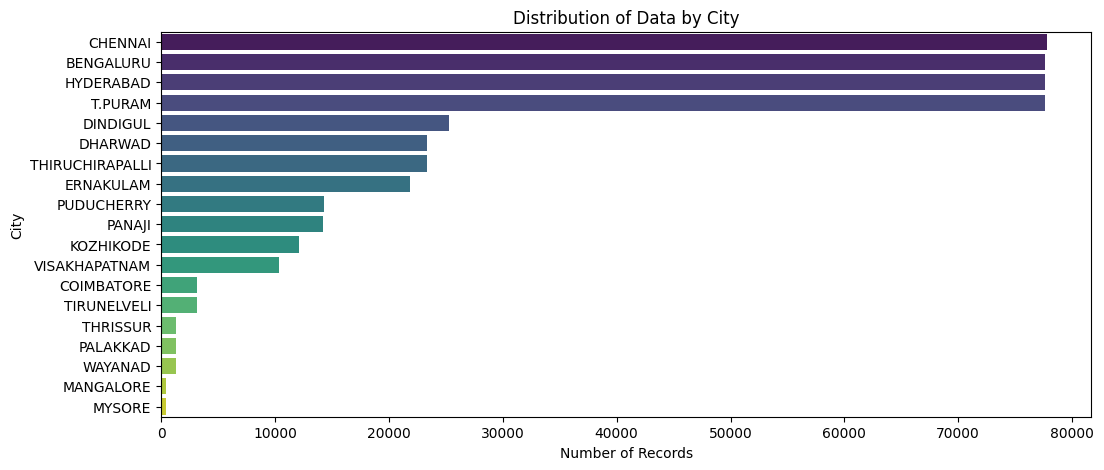

In [10]:
plt.figure(figsize=(12, 5))
sns.countplot(data=final_df, y="Centre_Name", order=final_df["Centre_Name"].value_counts().index, palette="viridis")
plt.xlabel("Number of Records")
plt.ylabel("City")
plt.title("Distribution of Data by City")
plt.show()


In [11]:
final_df["Month"] = final_df["Date"].dt.to_period("M")
monthly_prices = final_df.groupby("Month")["Price"].mean()
final_df.head()


,Date,Centre_Name,Commodity_Name,Price,Month
0,1997-11-25,BENGALURU,Brinjal,NaN,1997-11
1,1997-11-25,T.PURAM,Brinjal,NaN,1997-11
2,1997-11-25,CHENNAI,Brinjal,NaN,1997-11
3,1997-11-25,HYDERABAD,Brinjal,NaN,1997-11
4,1997-11-26,BENGALURU,Brinjal,NaN,1997-11


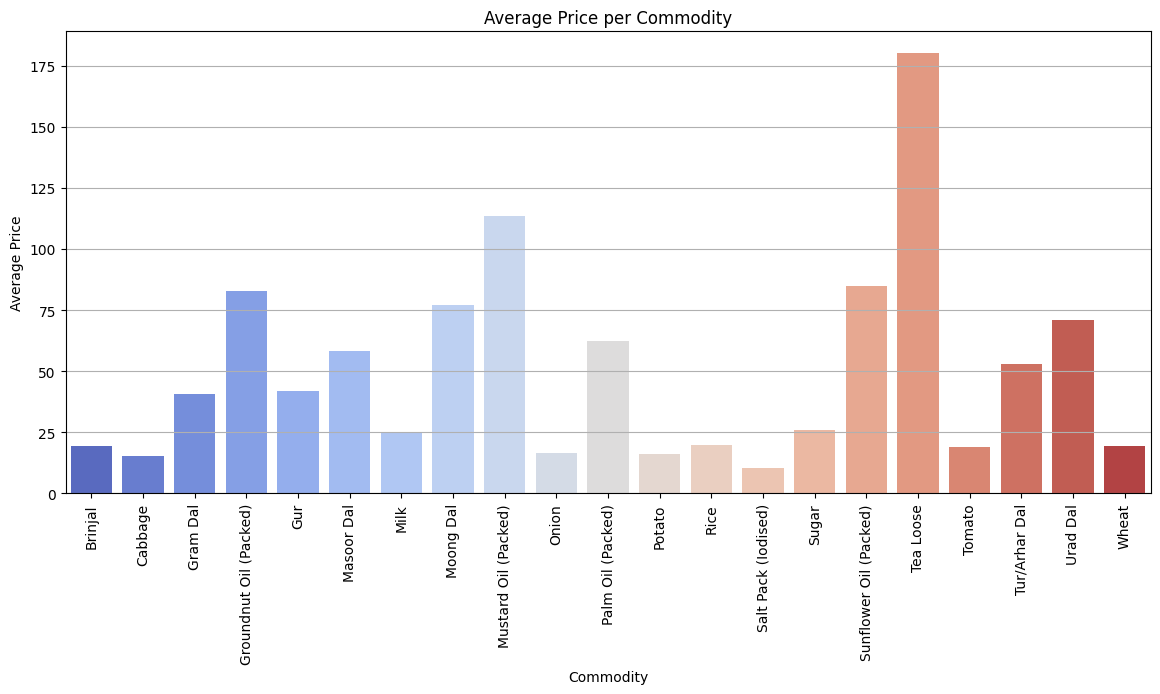

In [12]:
plt.figure(figsize=(14, 6))
sns.barplot(data=final_df, x="Commodity_Name", y="Price", errorbar=None, palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("Commodity")
plt.ylabel("Average Price")
plt.title("Average Price per Commodity")
plt.grid(axis="y")
plt.show()


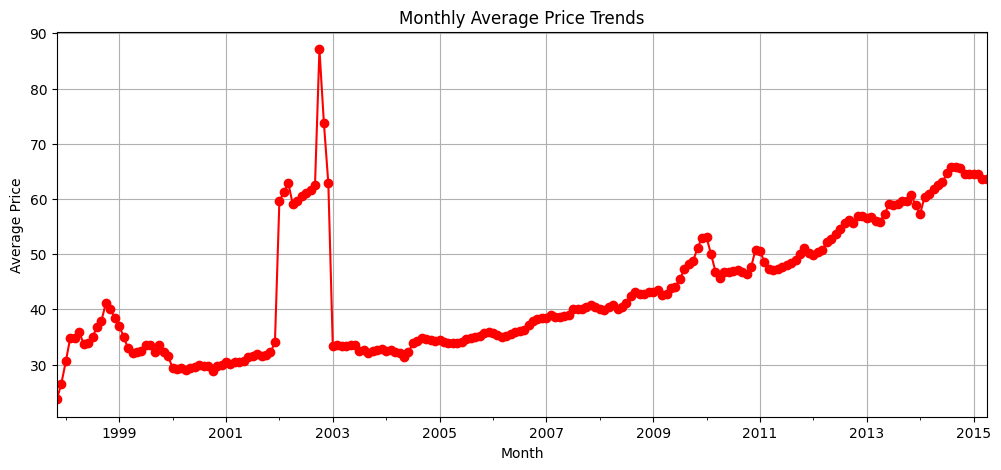

In [13]:

if monthly_prices.empty:
    print("Error: monthly_prices DataFrame is empty. Check your data processing pipeline.")
else:
    # Handle NaN values (fill with 0 or drop them)
    monthly_prices = monthly_prices.dropna()
    plt.figure(figsize=(12, 5))
monthly_prices.plot(marker="o", color="red")
plt.xlabel("Month")
plt.ylabel("Average Price")
plt.title("Monthly Average Price Trends")
plt.grid()
plt.show()


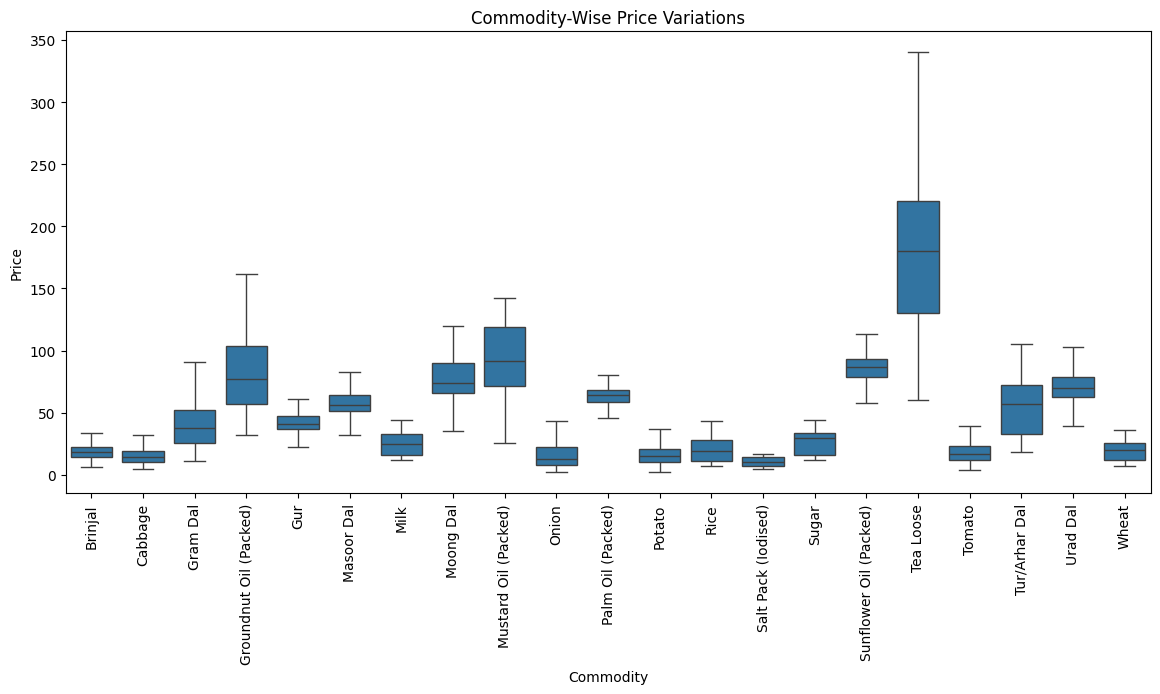

In [14]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=final_df, x="Commodity_Name", y="Price", showfliers=False)
plt.xticks(rotation=90)
plt.xlabel("Commodity")
plt.ylabel("Price")
plt.title("Commodity-Wise Price Variations")
plt.show()


In [15]:
final_df.to_csv(os.path.join(output_dir, "final_data.csv"), index=False, encoding="utf-8")
print("\nFinal cleaned dataset saved as 'final_data.csv' in:", output_dir)



Final cleaned dataset saved as 'final_data.csv' in: D:\A\miniproject3\datasets\filtered
